Estratagia con Opciones: VOLKSWAGEN AG (VOW)

Autor: Marcos Esteban Leguizamon Baez

marcosbaez1@upb.edu

# Introducción

**Enfoque:**

El propósito de este trabajo es mediante el estudio del comportamiento del precio de las acciones, simulaciones de escenarios, valoración de opciones poder desarrollar una estrategia con derivados financieros específicamente opciones europeas para poder obtener una rentabilidad en el corto plazo (1 año).

Descripción de la empresa: VOLKSWAGEN AG (VOW)
- Volkswagen AG es una empresa con sede en Alemania que fabrica y vende vehículos. El Grupo consta de dos divisiones: la División de Automoción y la División de Servicios Financieros.
- La División de Automoción comprende las áreas de negocio de Turismos, Vehículos Comerciales e Ingeniería Energética. Esta división se centra en el desarrollo de vehículos, motores y software para vehículos, la producción y venta de turismos, vehículos comerciales ligeros, camiones, autobuses y motocicletas, así como negocios de piezas originales, motores diésel de gran diámetro, turbomaquinaria y Componentes de propulsión.
- La División de Servicios Financieros se centra en actividades de financiación de distribuidores y clientes, leasing, banca directa y seguros, gestión de flotas y servicios de movilidad.
- Su cartera de marcas incluye Volkswagen, Audi, SEAT, SKODA, Bentley, Lamborghini, Porsche, Ducati, Volkswagen Vehículos Comerciales, Scania y MAN.

**Principales competidores:**
1. **Toyota Motor Corporation →** 7203.T
2. **Stellantis N.V. →** STLAMEUR.xbo
3. **General Motors (GM) →** GM
4. **Hyundai/Kia →** HYMTF
5. **Ford Motor Company →** F
6. **Nissan Motor Company →** 7201.T


# 1. Análisis del Comportamiento de las Acciones

##1.1. Análisis Estadístico



Mediante Python se hizo una gráfica que muestra el comportamiento de los precios durante el periodo de un año, es decir entre 01/05/2023 al 01/05/2024. También se realizó el cálculo de los rendimiento diarios del cambio de cada uno de estos precios. Para graficarlos y observar una distribución normal. Para de esta manera tener entendimiento entre rangos se encontraron los rendimientos de la empresa.

[*********************100%%**********************]  1 of 1 completed


Media de precios: 134.37675791978836
Desviación estándar de precios: 13.345282684610353
Precio máximo: 160.6999969482422
Precio mínimo: 106.4000015258789


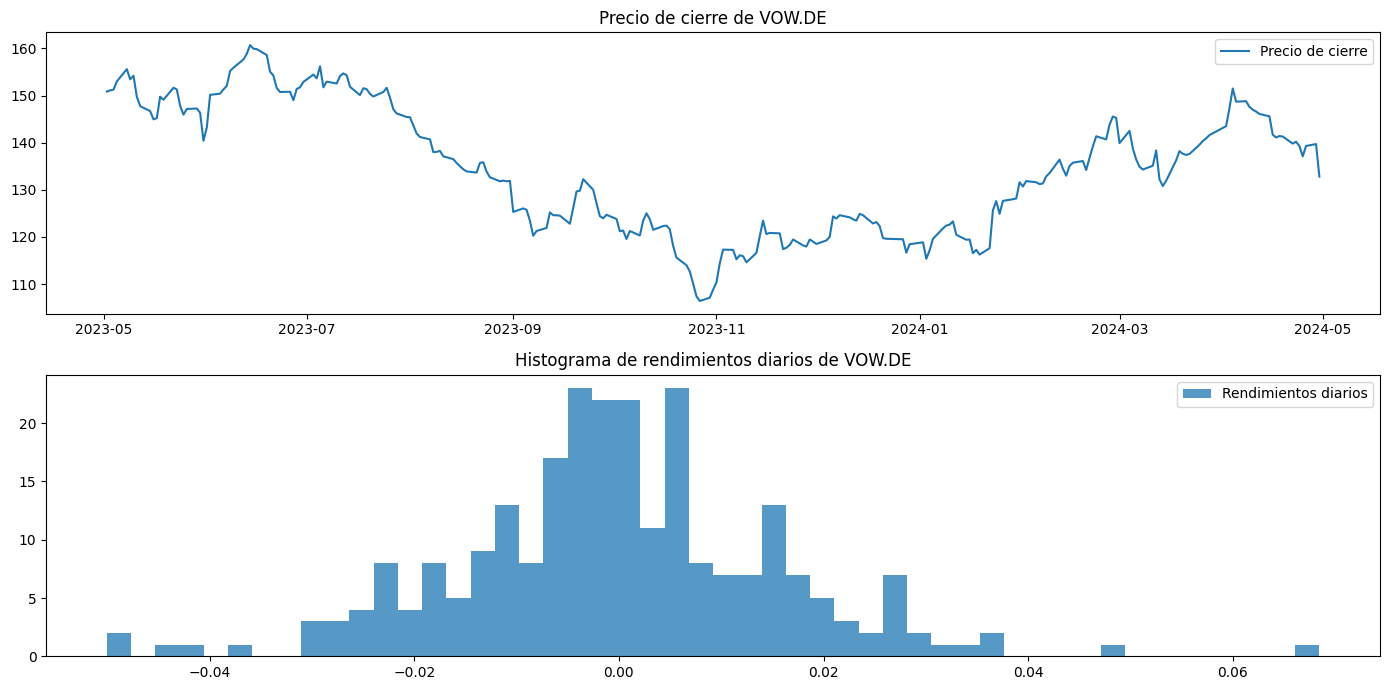

count    255.000000
mean      -0.000375
std        0.015816
min       -0.050038
25%       -0.008841
50%       -0.000803
75%        0.007760
max        0.068452
Name: Close, dtype: float64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Descarga de datos
ticker = 'VOW.DE'
data = yf.download(ticker, start='2023-05-01', end='2024-05-01')

# Estadísticas descriptivas
prices = data['Close']
returns = prices.pct_change().dropna()
stats_returns = returns.describe()

# Estadísticas adicionales sobre precios
mean_price = prices.mean()
std_price = prices.std()
max_price = prices.max()
min_price = prices.min()

# Imprimir estadísticas adicionales
print(f"Media de precios: {mean_price}")
print(f"Desviación estándar de precios: {std_price}")
print(f"Precio máximo: {max_price}")
print(f"Precio mínimo: {min_price}")

# Gráficos
plt.figure(figsize=(14, 7))

# Precio de cierre
plt.subplot(2, 1, 1)
plt.plot(prices, label='Precio de cierre')
plt.title('Precio de cierre de VOW.DE')
plt.legend()

# Histograma de rendimientos
plt.subplot(2, 1, 2)
plt.hist(returns, bins=50, alpha=0.75, label='Rendimientos diarios')
plt.title('Histograma de rendimientos diarios de VOW.DE')
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir estadísticas descriptivas de los retornos
print(stats_returns)


Las estadísticas del último año muestran una media en los precios de 134 euros, con una volatilidad de 13.4%. Una volatilidad mucho menor a la historia que se mostrara posteriormente, del 19%. Llegando a tener valores máximos y mínimos entre 160 y 106 euros. Mostrando que no posee un comportamiento tan volátil en al menos el ultimo año.

Por otro lado los rendimientos diarios de estos precios en su mayoría variaron entre el  -0.04 y el +0.04.

##1.2. Análisis Técnico

[*********************100%%**********************]  1 of 1 completed


Media de precios: 134.37675791978836
Desviación estándar de precios: 13.345282684610353
Precio máximo: 160.6999969482422
Precio mínimo: 106.4000015258789


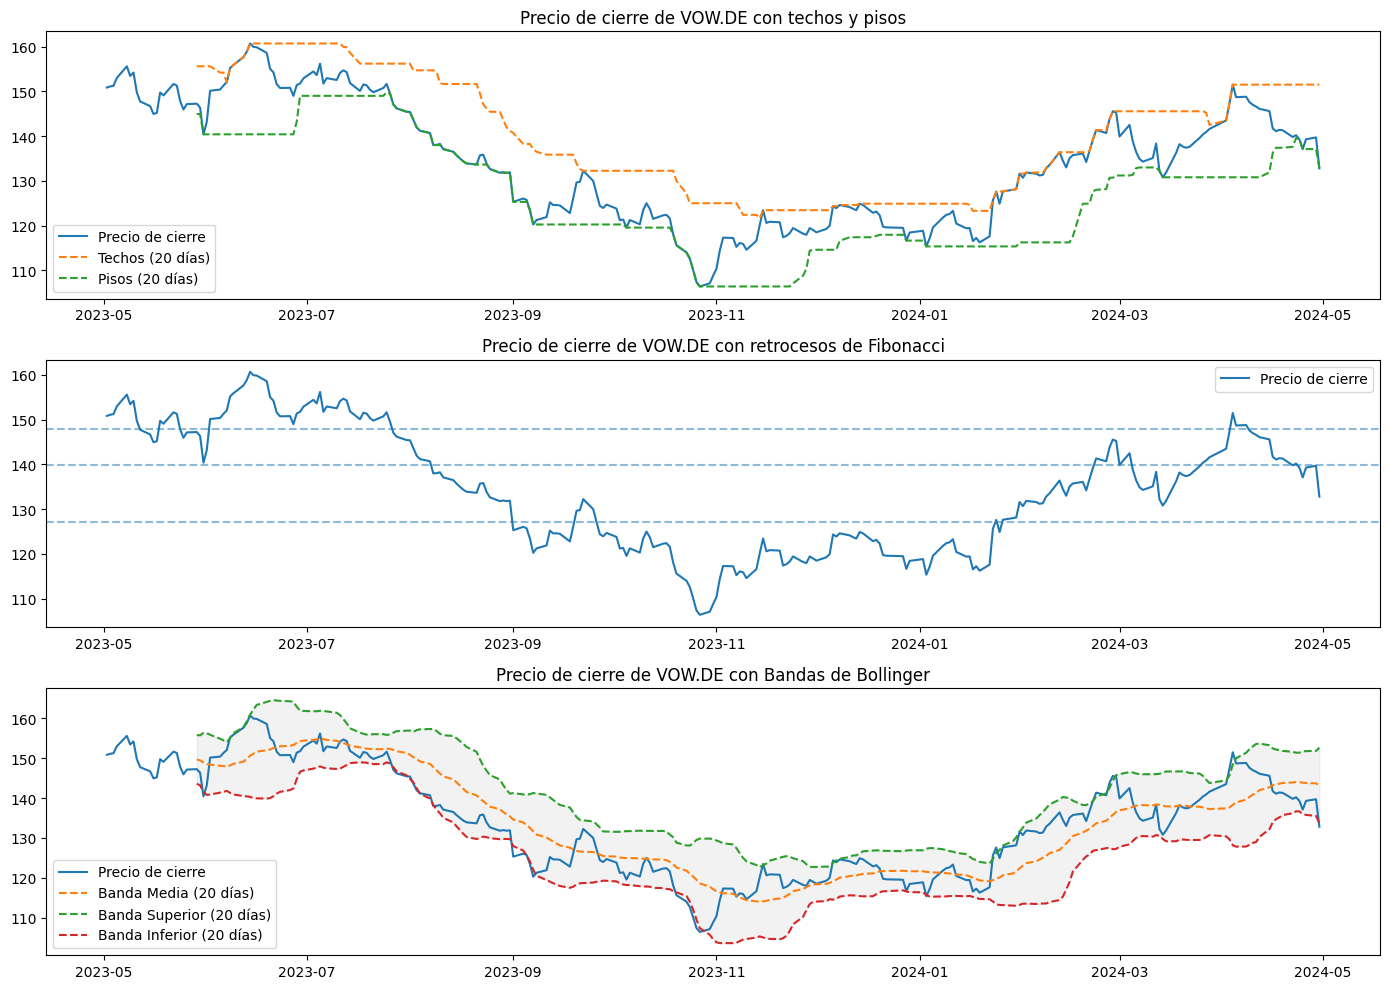

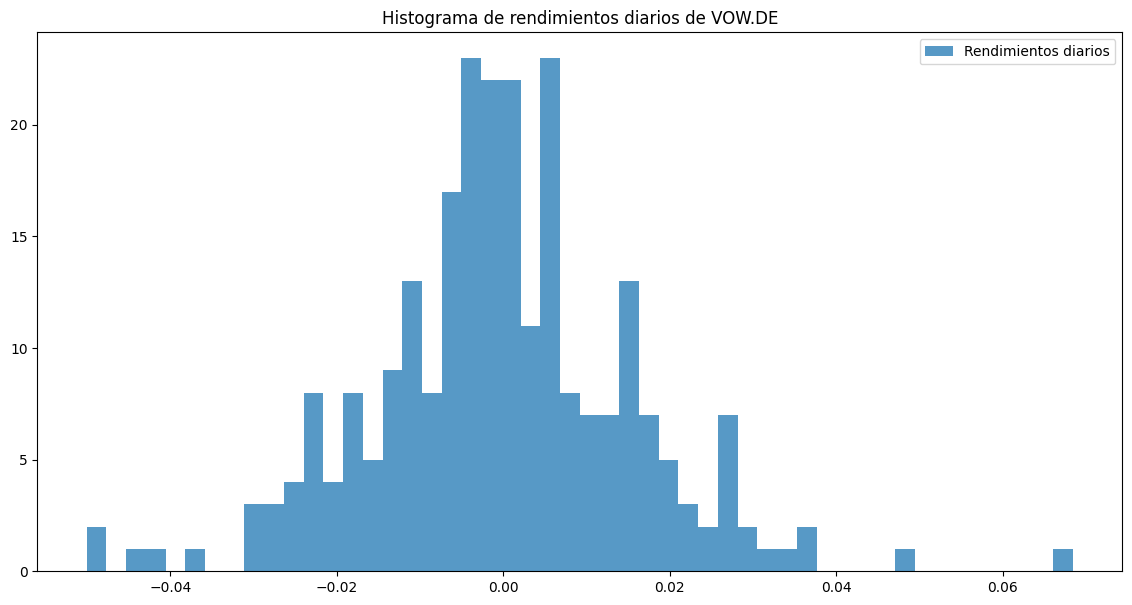

count    255.000000
mean      -0.000375
std        0.015816
min       -0.050038
25%       -0.008841
50%       -0.000803
75%        0.007760
max        0.068452
Name: Close, dtype: float64


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Descargar datos
ticker = 'VOW.DE'
data = yf.download(ticker, start='2023-05-01', end='2024-05-01')

# Estadísticas descriptivas
prices = data['Close']
returns = prices.pct_change().dropna()
stats_returns = returns.describe()

# Estadísticas adicionales sobre precios
mean_price = prices.mean()
std_price = prices.std()
max_price = prices.max()
min_price = prices.min()

# Imprimir estadísticas adicionales
print(f"Media de precios: {mean_price}")
print(f"Desviación estándar de precios: {std_price}")
print(f"Precio máximo: {max_price}")
print(f"Precio mínimo: {min_price}")

# Calcular techos y pisos
roll_max = prices.rolling(window=20).max()
roll_min = prices.rolling(window=20).min()

# Calcular retrocesos de Fibonacci
max_price = prices.max()
min_price = prices.min()
diff = max_price - min_price
levels = [max_price - 0.236 * diff, max_price - 0.382 * diff, max_price - 0.618 * diff]

# Calcular Bandas de Bollinger
bollinger_mid = prices.rolling(window=20).mean()
bollinger_std = prices.rolling(window=20).std()
bollinger_upper = bollinger_mid + (bollinger_std * 2)
bollinger_lower = bollinger_mid - (bollinger_std * 2)

# Gráficos
plt.figure(figsize=(14, 10))

# Precio de cierre con techos y pisos
plt.subplot(3, 1, 1)
plt.plot(prices, label='Precio de cierre')
plt.plot(roll_max, label='Techos (20 días)', linestyle='--')
plt.plot(roll_min, label='Pisos (20 días)', linestyle='--')
plt.title('Precio de cierre de VOW.DE con techos y pisos')
plt.legend()

# Precio de cierre con retrocesos de Fibonacci
plt.subplot(3, 1, 2)
plt.plot(prices, label='Precio de cierre')
for level in levels:
    plt.axhline(level, linestyle='--', alpha=0.5)
plt.title('Precio de cierre de VOW.DE con retrocesos de Fibonacci')
plt.legend()

# Precio de cierre con Bandas de Bollinger
plt.subplot(3, 1, 3)
plt.plot(prices, label='Precio de cierre')
plt.plot(bollinger_mid, label='Banda Media (20 días)', linestyle='--')
plt.plot(bollinger_upper, label='Banda Superior (20 días)', linestyle='--')
plt.plot(bollinger_lower, label='Banda Inferior (20 días)', linestyle='--')
plt.fill_between(prices.index, bollinger_lower, bollinger_upper, color='gray', alpha=0.1)
plt.title('Precio de cierre de VOW.DE con Bandas de Bollinger')
plt.legend()

plt.tight_layout()
plt.show()

# Histograma de rendimientos
plt.figure(figsize=(14, 7))
plt.hist(returns, bins=50, alpha=0.75, label='Rendimientos diarios')
plt.title('Histograma de rendimientos diarios de VOW.DE')
plt.legend()
plt.show()

# Imprimir estadísticas descriptivas de los retornos
print(stats_returns)


### Análisis Técnico del Precio de las Acciones de Volkswagen (VOW.DE)

Para realizar un análisis profundo del comportamiento del precio de las acciones de Volkswagen (VOW.DE), utilizamos tres herramientas técnicas clave: techos y pisos, retrocesos de Fibonacci y Bandas de Bollinger. A continuación, se presenta un análisis detallado de cada herramienta y sus implicaciones.

#### 1. Techos y Pisos
Los techos y pisos nos permiten identificar niveles de resistencia y soporte respectivamente, utilizando una ventana móvil de 20 días.

**Techos (Resistencia):**
- Los techos representan los niveles más altos que el precio ha alcanzado en un período reciente (20 días). Si el precio se aproxima a estos niveles repetidamente pero no logra superarlos, estos niveles actúan como una resistencia.
- **Análisis:** La presencia de techos claramente definidos puede indicar que los vendedores están activos en esos niveles, evitando que el precio suba más. Si observamos que los techos están disminuyendo con el tiempo, puede sugerir una tendencia bajista.

**Pisos (Soporte):**
- Los pisos representan los niveles más bajos alcanzados en el mismo período de tiempo. Si el precio se aproxima a estos niveles repetidamente pero no cae por debajo de ellos, estos niveles actúan como un soporte.
- **Análisis:** La presencia de pisos claramente definidos puede indicar que los compradores están activos en esos niveles, evitando que el precio caiga más. Si los pisos están aumentando con el tiempo, puede sugerir una tendencia alcista.

**Observaciones del Gráfico:**
- Si observamos que el precio ha estado oscilando entre los techos y pisos sin una dirección clara, esto puede indicar un mercado lateral o de consolidación.
- Una ruptura por encima de los techos o por debajo de los pisos puede ser una señal de que una nueva tendencia está comenzando.

#### 2. Retrocesos de Fibonacci
Los niveles de Fibonacci son utilizados para identificar posibles niveles de soporte y resistencia basados en el rango de precios máximo y mínimo.

**Niveles de Fibonacci (23.6%, 38.2%, 61.8%):**
- Estos niveles nos ayudan a identificar áreas donde el precio podría encontrar soporte o resistencia al retroceder después de un movimiento significativo.
- **Análisis:**
    - **23.6%:** Un retroceso leve que sugiere una corrección superficial y una fuerte tendencia subyacente.
    - **38.2%:** Un retroceso más significativo pero todavía dentro de los límites de una corrección de tendencia.
    - **61.8%:** Un retroceso profundo que podría indicar un cambio más significativo en la tendencia.

**Observaciones del Gráfico:**
- Si el precio rebota en un nivel de Fibonacci y retoma su dirección anterior, esto puede confirmar que el nivel actúa como soporte o resistencia.
- La incapacidad del precio para mantenerse en estos niveles puede indicar una continuación en la dirección opuesta. Se puede ver como el mercado tomo liquidez para ir a la baja. Sin embargo no indica que en el largo plazo los precios tiendan a la baja, solo muestra que el proximo moviemiento más probable es una baja de precios. Pero los precios podrian tender a subir despues una nueva toma de liquidez.

#### 3. Bandas de Bollinger
Las Bandas de Bollinger consisten en una banda media (media móvil de 20 días) y dos bandas (superior e inferior) que se encuentran a dos desviaciones estándar de la media móvil.

**Banda Media:**
- Representa la tendencia media del precio durante el período observado.
- **Análisis:** Si el precio se mantiene alrededor de la banda media, puede indicar una falta de tendencia clara.

**Banda Superior e Inferior:**
- Las bandas superior e inferior indican niveles de sobrecompra y sobreventa respectivamente.
- **Análisis:**
    - **Banda Superior:** Si el precio toca o se mueve por encima de la banda superior, puede indicar condiciones de sobrecompra y una posible corrección a la baja.
    - **Banda Inferior:** Si el precio toca o se mueve por debajo de la banda inferior, puede indicar condiciones de sobreventa y una posible corrección al alza.

**Observaciones del Gráfico:**
- Si las bandas se están expandiendo, esto sugiere una mayor volatilidad. En este caso se puede ver como en ningun momento las bandas tienden a juntarse, todo lo contrario, muestran una separacion amplia, indicando que existe una volatilidad que nunca reduce y tienede a expandirse.

##1.3. Análisis Fundamental

###1.3.1. Análisis con le herramienta Refinitiv Eikon


Para esta sección se extrajo información financiera y múltiplos cálculos por la herramienta de Refinitiv Eikon. Tomando en cuenta la lista previamente mostrada de los competidores de VOW para poder hacer un análisis de múltiplos y poder comparar como está la empresa en relación con empresas similares.

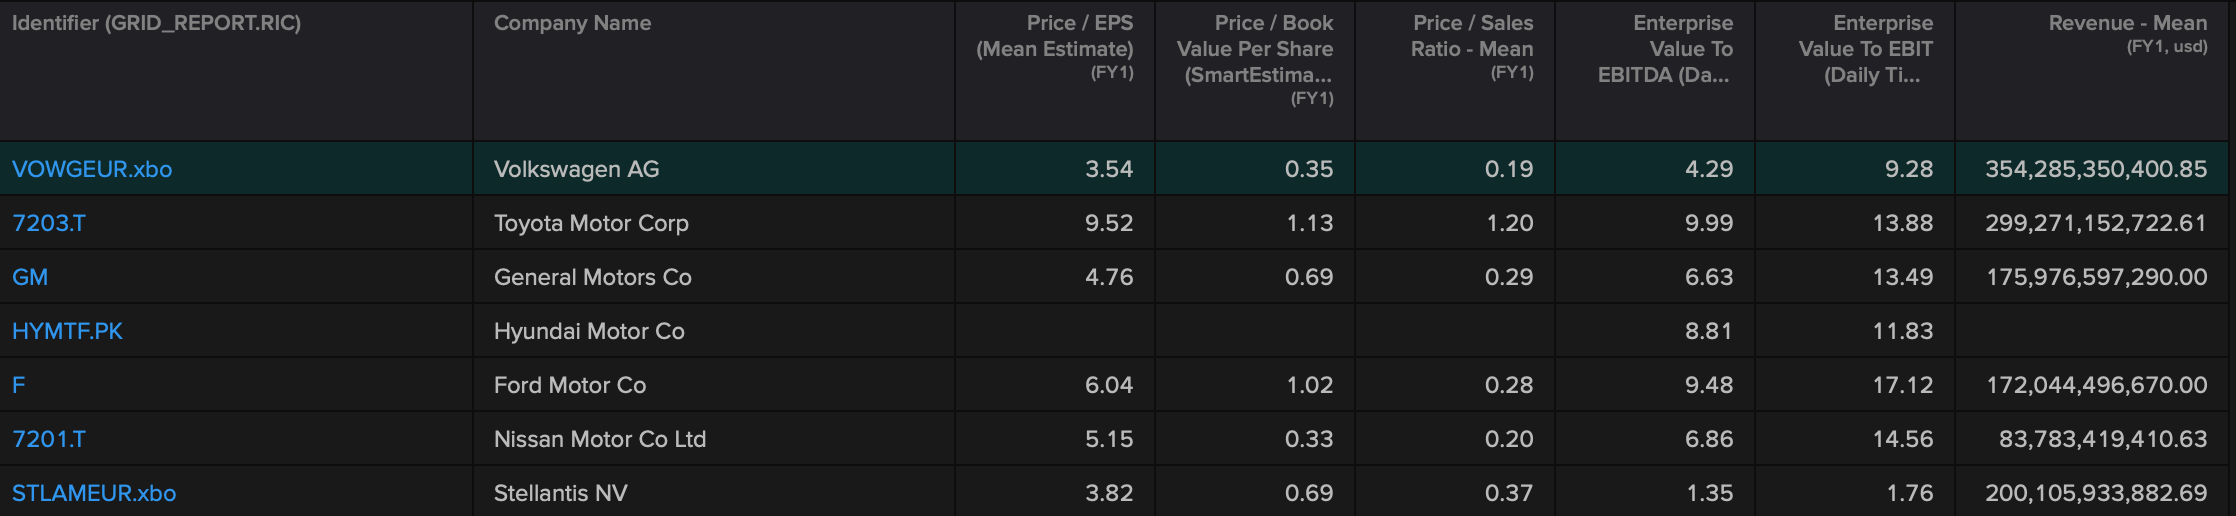

**Precio/beneficio por acción:**

Volkswagen tiene un precio/beneficio por acción más bajo que Toyota, Hyundai y Ford, pero más alto que General Motors, Nissan y Stellantis. Esto sugiere que Volkswagen está infravalorada en relación con Toyota, Hyundai y Ford, pero sobrevalorada en relación con General Motors, Nissan y Stellantis.

**Precio/valor en libros:**

El precio/valor en libros de Volkswagen es más bajo que el de Toyota, General Motors y Hyundai, pero más alto que el de Ford, Nissan y Stellantis. Esto sugiere que Volkswagen está infravalorada en relación con Toyota, General Motors y Hyundai, pero sobrevalorada en relación con Ford, Nissan y Stellantis.

**Precio/ratio de ventas:**

El precio/ratio de ventas de Volkswagen es más bajo que el de Toyota, General Motors y Hyundai, pero más alto que el de Ford, Nissan y Stellantis. Esto sugiere que Volkswagen está infravalorada en relación con Toyota, General Motors y Hyundai, pero sobrevalorada en relación con Ford, Nissan y Stellantis.

**Valor empresarial/EBITDA:**

El valor empresarial/EBITDA (Ratio de tiempo diario) de Volkswagen es similar al de Toyota y General Motors, pero más alto que el de Ford, Nissan y Stellantis. Esto sugiere que Volkswagen está valorada de manera justa en relación con Toyota y General Motors, pero sobrevalorada en relación con Ford, Nissan y Stellantis.

**Valor empresarial/EBIT:**

El valor empresarial/EBIT (Ratio de tiempo diario) de Volkswagen es similar al de Toyota y General Motors, pero más alto que el de Ford, Nissan y Stell.

###1.3.2. Análisis con Trading View

La herramienta Trading View utiliza la publicación de diferente analistas certificados. Resumiendo, la opinión de profesionales en varias tablas, haciendo también una comparación entre sus análisis y los resultados reales al final del periodo.

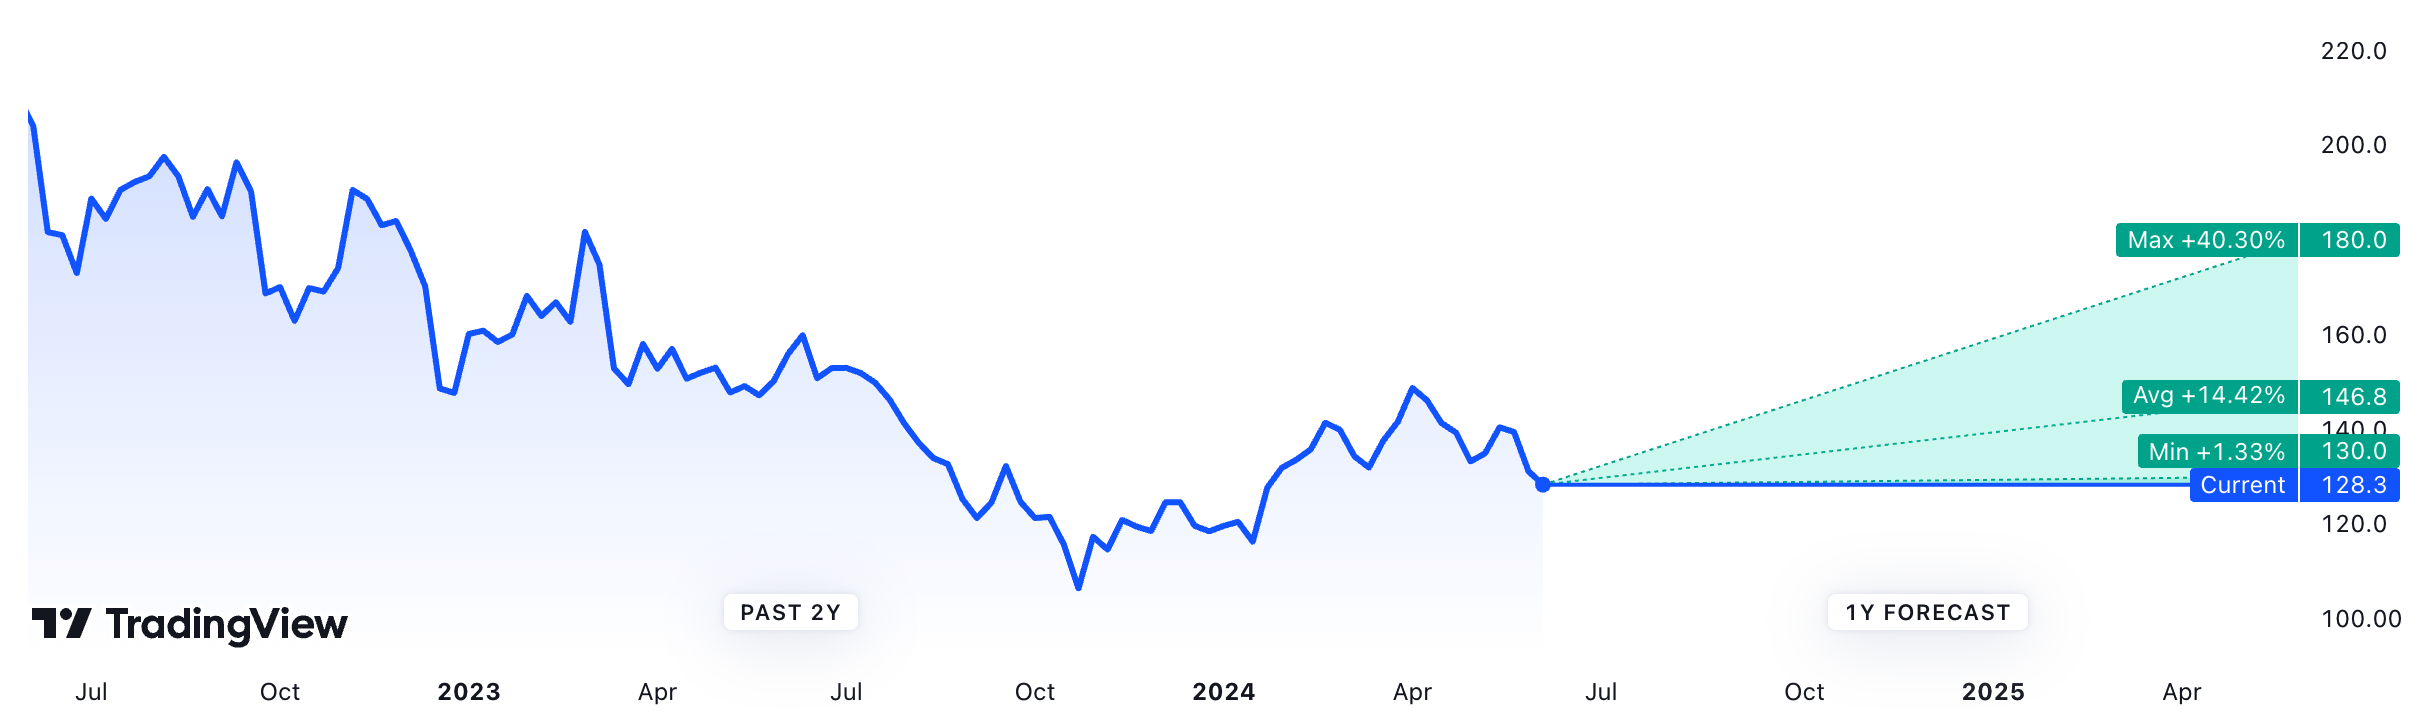

El grafico muestra la expectativa general que tienen los analistas de la empresa. Mediante no solo un análisis técnico sino también un análisis fundamental y por noticas. Que en este caso es lo más relevante para poder definir un expectativa para el caso de VOW. Pero se hablará específicamente de las noticas y la imagen publica de VOW más adelante. Se puede observar que las expectativas están fuertemente inclinadas a que el precio subirá para el próximo año. Mostrando un crecimiento en los precios de las acciones del 40.3% al 1.3%.

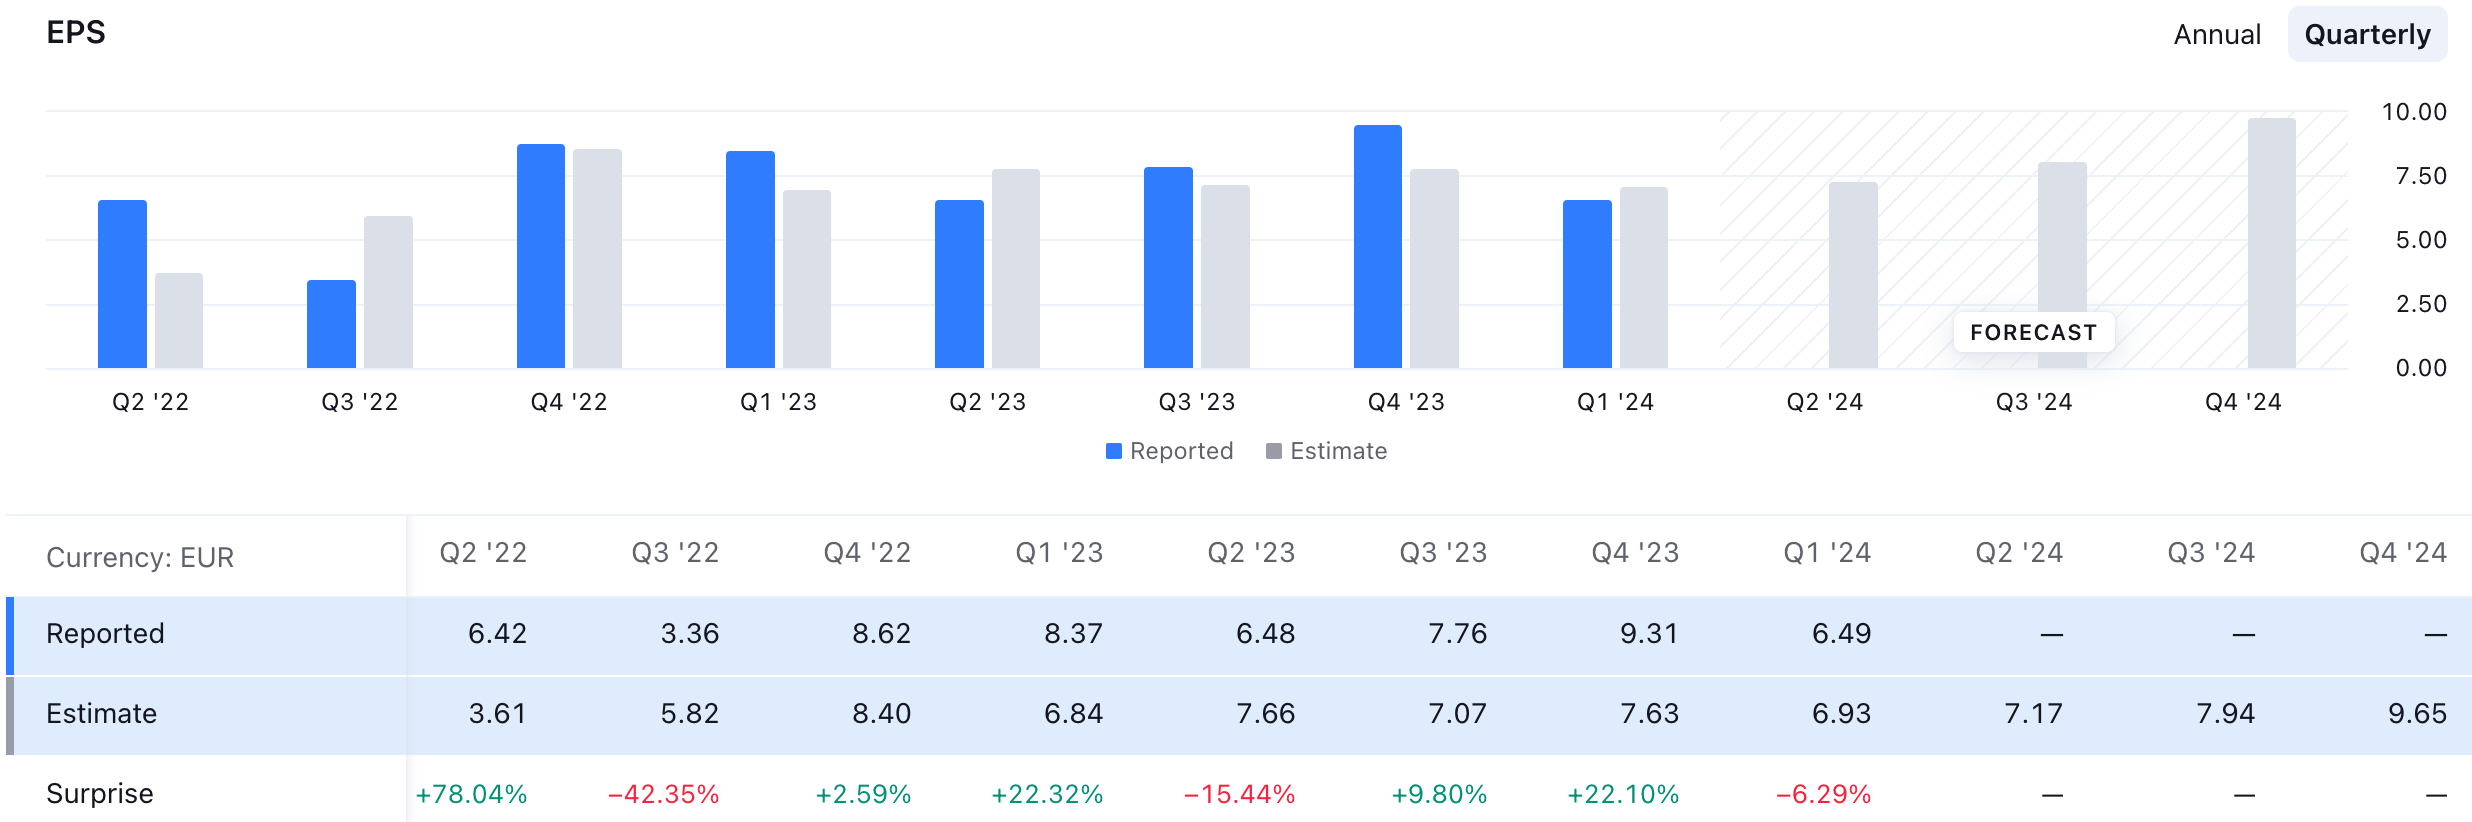

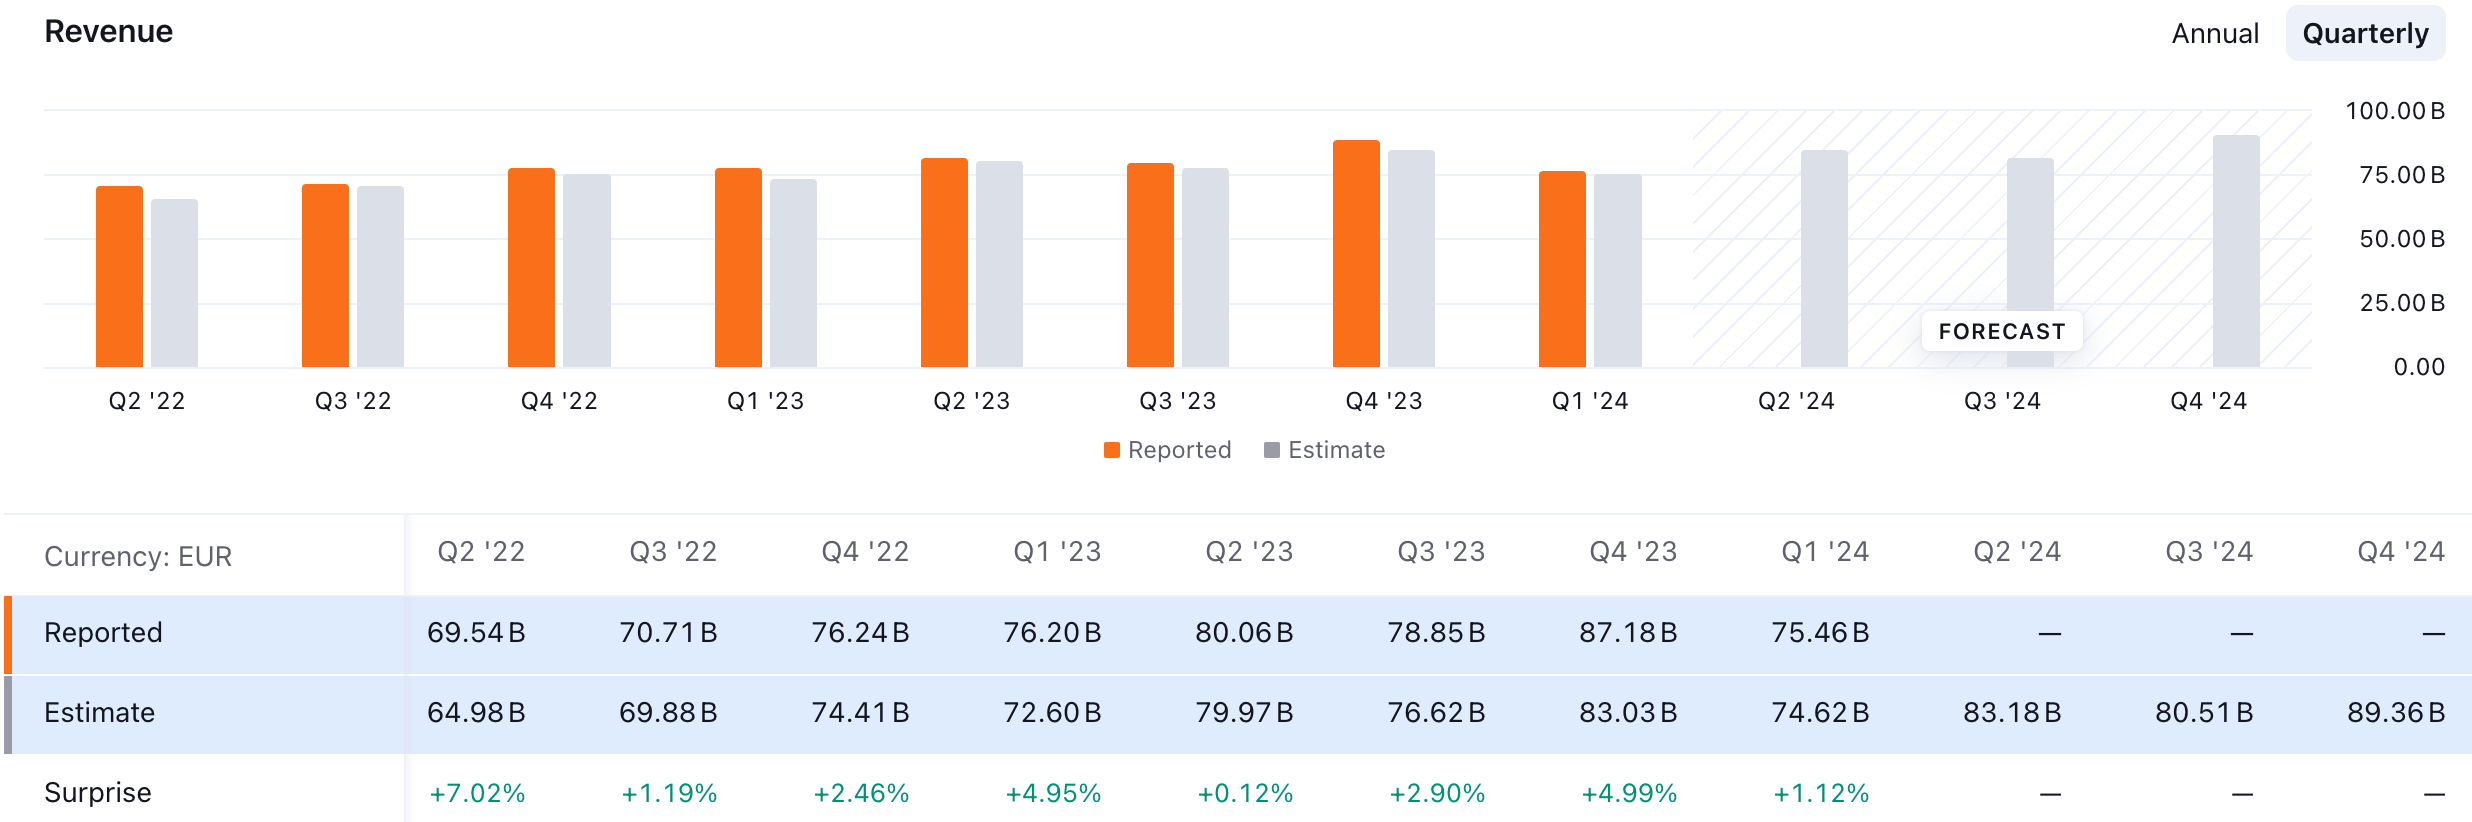

En esta dos tablas se puede ver los earnings per-share en azul y se puede ver la ganancia en naranja. Por el lado de los EPS se puede que si existe un margen de error bastante grande entre lo esperado y los resultados. Llegando a sobreestimar en un 15.44%, sin embargo, en los siguientes periodos fue mucho más cercano y en ocasiones llegando a subestimarlo. Lo que se rescata de esto es que las proyecciones a pesar de tener un margen de error no llegaron a estar muy alejadas de la realidad. Por lo que la proyección que se tiene para hasta el último cuarto del 2024 se puede esperar que sean acertadas. Muestran un crecimiento en relación con el año anterior, haciendo que las acciones se vean más atractivas para inversionistas. Significa que la empresa esta logrando generar ganancias para sus inversores.

Adicionalmente tenemos el grafico de ganancia o revenue, el cual el margen de error es mínimo. Se puede ver como el mayor error fue una subestimación del 4.99%. Mostrando una gran precisión a la hora de hacer proyecciones. En esta caso de igual manera las proyecciones indican un crecimiento del revenue para finales del 2024 de 89.36 mil millones de euros. Mucho mayor que el del 2023 que fue de 83 mil millones. Esto indica que el precio de las acciones de la empresa subirían de precio por la mejora de la empresa a la hora de generar ganancias.


### 1.3.3. Noticias

**Inversión en vehículos eléctricos:**

Volkswagen está invirtiendo fuertemente en el desarrollo de vehículos eléctricos (EVs). Se espera que la compañía lance 30 nuevos modelos de EV para el 2025. Esta inversión podría dar sus frutos en el futuro, a medida que la demanda de EVs crezca. Esto deja a la empresa preparada para las regulaciones de emisión de sus motores, entrando al mundo de empresas enfocadas a reducir la contaminación. Haciendo que la imagen de la marca suba de gran manera y entre fuertemente al mercado de autos eléctricos.

Fuentes:
- https://www.volkswagen-newsroom.com/en/press-releases
- https://www.reuters.com/business/autos-transportation/volkswagen-investment-planning-round-take-place-friday-handelsblatt-2023-02-10/
- https://www.bloomberg.com/news/articles/2024-05-08/vw-brand-to-beef-up-hybrid-offering-as-ev-shift-stumbles

**Entrada en nuevos mercados:**

 Volkswagen está expandiendo su presencia en nuevos mercados, como China y América del Sur con el uso de nuevas estrategias. Esto podría aumentar las ventas y las ganancias de la compañía.

 Fuentes:
 - https://annualreport2021.volkswagenag.com/
 - https://www.ft.com/content/a0422ed0-eca0-4e0b-9492-3ce4ac8e0bee
 - https://www.volkswagen-newsroom.com/en/press-releases/volkswagen-brand-invests-one-billion-euros-for-growth-in-south-america-17431

**Mejora de la eficiencia:**

Volkswagen está implementando una serie de medidas para mejorar su eficiencia operativa. Esto podría conducir a un aumento de los márgenes de ganancia.

Fuentes:
- https://www.volkswagen-group.com/en/publications/corporate/sustainability-report-2021-1947
- https://www.handelsblatt.com/unternehmen/industrie/autoindustrie-sparprogramm-bei-marke-volkswagen-zeigt-erste-erfolge-03/100023927.html
- https://www.reuters.com/business/autos-transportation/volkswagen-brand-plans-yield-4-bln-euros-2024-cost-cutting-drive-2023-12-19/


**Repatriación de efectivo:**

Volkswagen está repatriando efectivo de sus operaciones en el extranjero. Esto podría aumentar la disponibilidad de efectivo para la compañía y conducir a recompras de acciones o dividendos más altos.

Fuentes:
-  https://annualreport2022.volkswagenag.com/
- https://www.reuters.com/business/finance/volkswagens-financial-services-undergoing-reorganization-2023-03-01/
- https://www.bloomberg.com/news/articles/2023-02-07/volkswagen-misses-full-year-cash-target-due-to-supply-chain-woes


##1.4. Expectativa

Después de todo el análisis técnico, estadístico, y fundamental, se genera una expectativa de una suba de precios en las acciones de VOW, pero con una alta volatilidad. Por tema de noticas es evidente que el siguiente año es importante para VOW, sacar 30 nuevos vehículos eléctricos es algo muy desafiante y que tendrá un gran impacto en la empresa. En caso de que estos nuevos vehículos sean bien aceptados por los medios y cumplan con estándares no solo de calidad sino de eficiencia, mejoraría mucho la imagen de la empresa. Mostraría que la empresa está lista para el futuro y estar en un mercado de autos que no contaminen. Algo importante ya que poco a poco se le van colocando más regulaciones y limitaciones a la producción de vehículos a combustión. VOW es una empresa que se enfoca mucho en su imagen y calidad, por lo que es poco probable que fabriquen 30 modelos malos o que no estén en el estándar de la marca. Haciendo que se pueda esperar una gran subida en los pecios de las acciones de la empresa.

Sin embargo, esto también es algo riesgoso, ya que sacar 30 nuevos modelos de autos eléctricos es un movimiento tan grande para la imagen de la empresa que. Como se dijo anteriormente es muy poco probable que la opinión del publico sienta que sean malos vehículos, pero en caso de que reciban una opinión negativa los precios caerían fuertemente. Una mala notica tiene gran impacto en el precio de acciones, como fue el caso de 2015 cuando VOW daño la imagen de la marca al colocar un software ilegal que falsificaba la emisión de sus vehículos. Ese evento provocó una caída en los precios de sus acciones, pasando de 253 por acción a 127 por acción, una bajada de más del 50%. Mostrando el impacto que tiene el machan la imagen de la marca. Y en este caso la caída podría llegar a ser igual, porque una mala opinión publica de los nuevos vehículos mostraría una mala gestión por parte de VOW. Dada las grandes cantidades de dinero que se invirtieron en para poder no solo expandir sino mejorar eficiencia e investigación, todo para hacer vehículos que no llegaron a satisfacer al público. Algo que preocuparía mucho a los inversionistas, preocuparía la capacidad que tengan de generar ingresos con las inversiones que hicieron.

Adicionalmente mediante el análisis estadístico se pudo ver que la volatilidad del último año fue del 12% siendo el 19% el histórico. Una volatilidad que se va a expandir mucho más para el próximo año dada las noticias presentadas. En pocas palabras, se espera gran volatilidad para VOW en el próximo año. Con una expectativa principalmente a la alza de los precios, pero también se podría esperar una fuerte baja en los precios si el público no recibe bien los nuevos modelos de la marca.


#2. Simulación de Monte Carlo

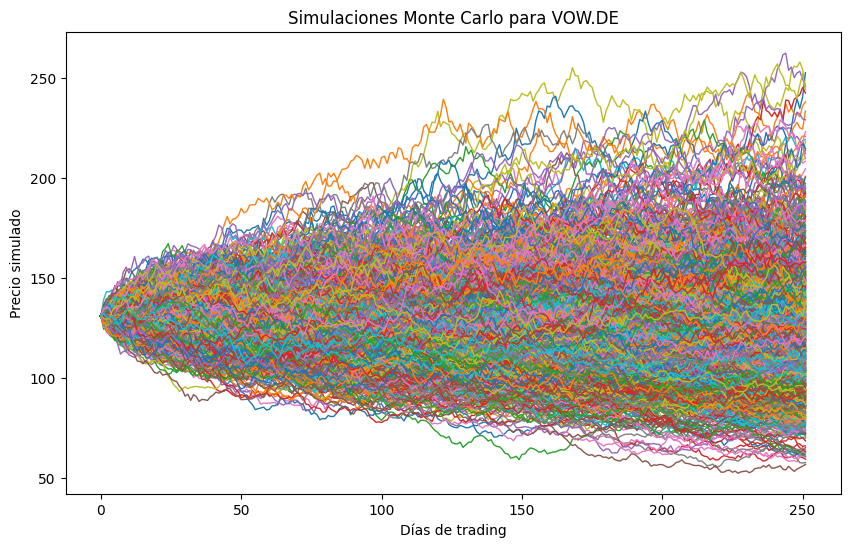

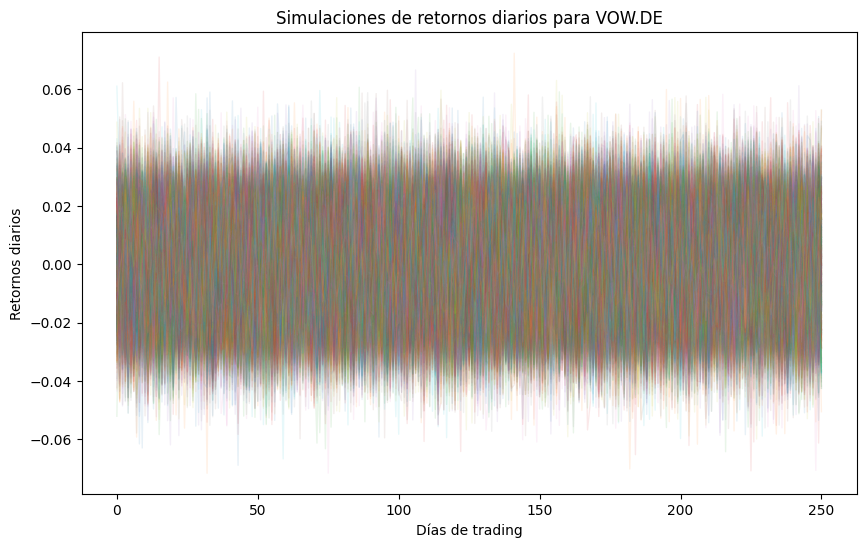

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
S0 = prices[-1]  # Precio actual
mu = returns.mean()
sigma = returns.std()
T = 252  # Un año de trading
simulations = 1000  # Número de simulaciones

# Simulación
np.random.seed(42)
simulated_prices = np.zeros((T, simulations))
simulated_prices[0] = S0

for t in range(1, T):
    Z = np.random.standard_normal(simulations)
    simulated_prices[t] = simulated_prices[t-1] * np.exp((mu - 0.5 * sigma**2) + sigma * Z)

# Gráfico de las simulaciones de precios
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices, lw=1)
plt.title('Simulaciones Monte Carlo para VOW.DE')
plt.xlabel('Días de trading')
plt.ylabel('Precio simulado')
plt.show()

# Cálculo de retornos diarios para cada simulación
simulated_returns = np.log(simulated_prices[1:] / simulated_prices[:-1])

# Gráfico de las simulaciones de retornos
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(simulated_returns[:, i], lw=1, alpha=0.1)  # Use alpha for transparency
plt.title('Simulaciones de retornos diarios para VOW.DE')
plt.xlabel('Días de trading')
plt.ylabel('Retornos diarios')
plt.show()



Se realizo una simulación de 1000 posibles casos para el precio de las acciones de VOW. De igual manera se realizó el grafico de los retornos de estos precios para el periodo de un año o 252 de trading. Mostrando que en la mayoría de los casos los retornos varían entre los valores de -0.04 y +0.04.

#3. Valoración de Opciones con REFINITIV

Se realizo el cálculo con la herramienta refinitiv de la prima para dos opciones, una call y una put. Dejando que el precio de ejercicio, el tiempo de expiración y el activo subyacente sean los mismos para los dos.

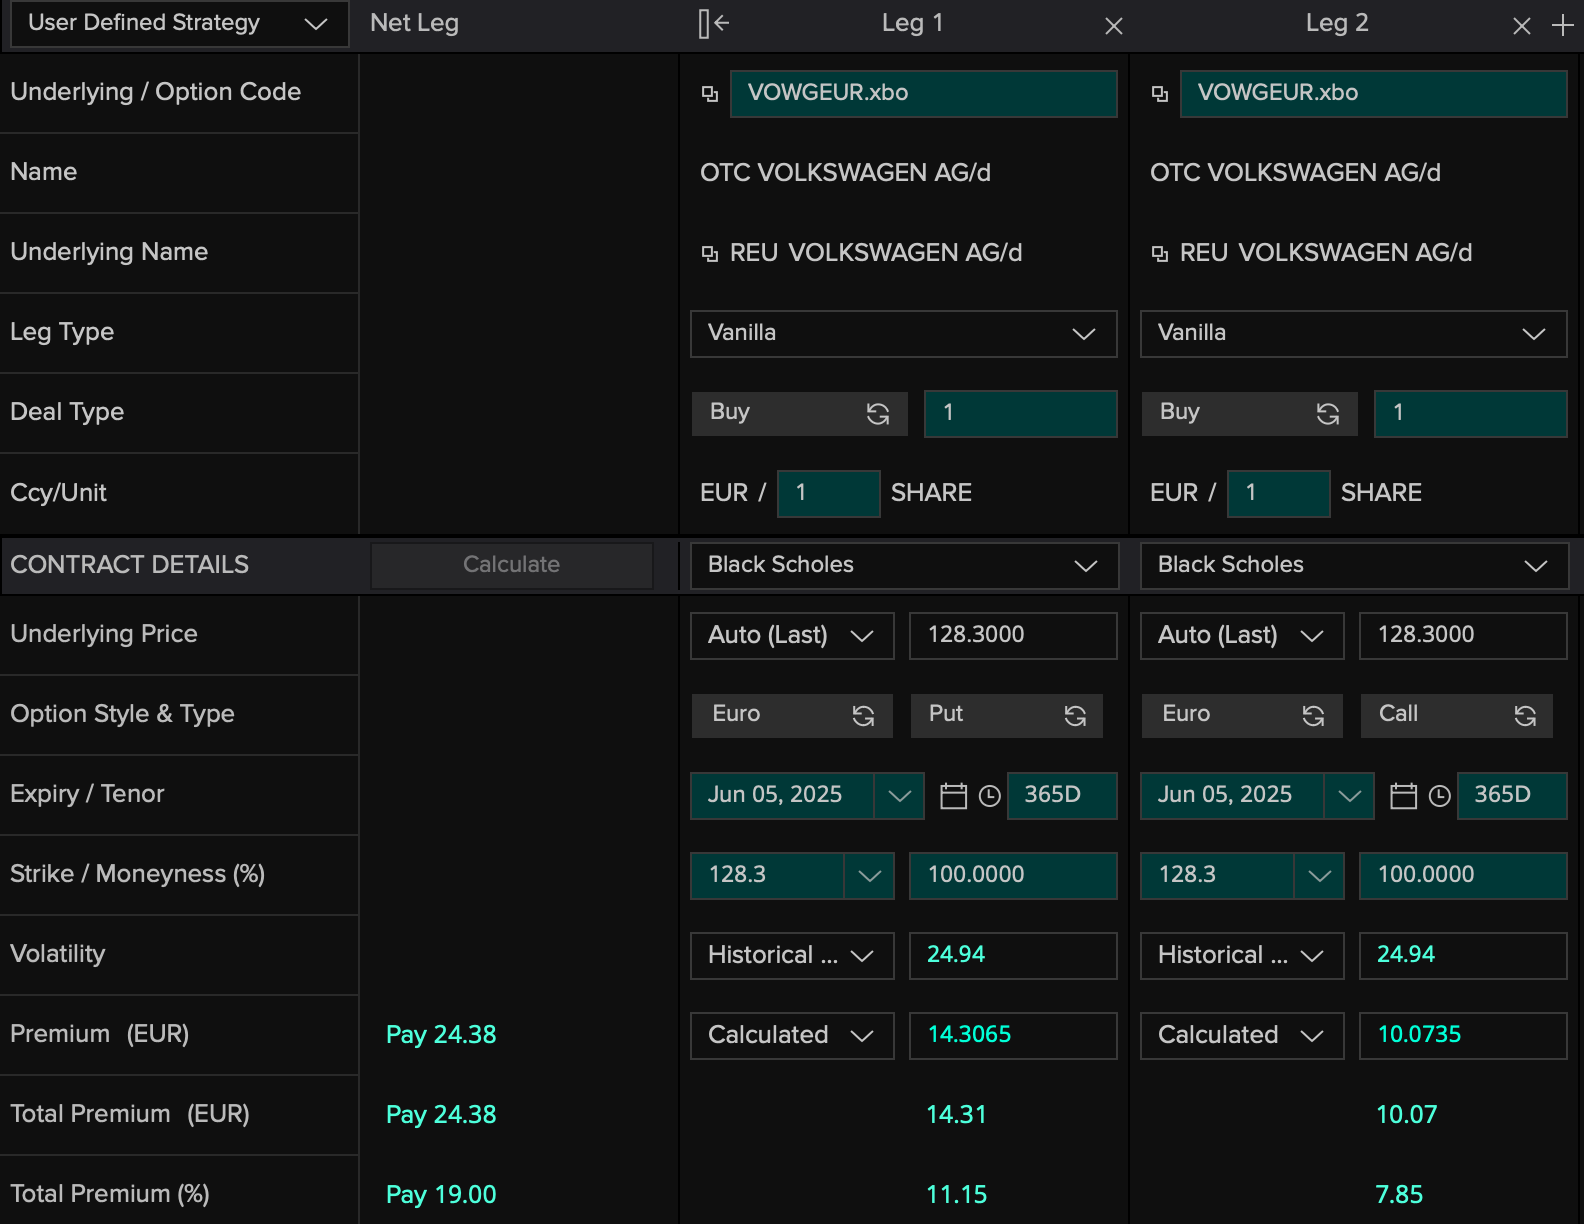

El calculo de las primas de los contratos call y put indican la expectativa del mercado. En este caso tenemos dos contratos con la misma fecha de expiracion, mismo precio de ejercicio, sobre el mismo activo subyacente. Se puede ver la prima para la opcion call en esta caso es de 10.07 siendo menor a la prima del put de 14.3. Esto indica que se tiene una expectativa que el precio del activo subyacente baje. Dado que un precio de Call más bajo implica que el comprador está pagando menos por el derecho a comprar el activo, lo que sugiere que el mercado espera que el precio del activo subyacente se mantenga por debajo del precio de ejercicio para que la opción sea rentable. Por otro lado un precio de Put más alto implica que el comprador está pagando más por el derecho a vender el activo, lo que sugiere que el mercado espera que el precio del activo subyacente baje por debajo del precio de ejercicio para que la opción sea rentable.

Algo que esta en contra del análisis de expectativa de que el precio sube en el plazo de un año. Pero esto es el calculo de refnitiv, se hara un calculcu en python para comparación.


#4. Valoración de Opciones y Cálculo de las Griegas en Python

In [25]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

# Función para calcular el precio de una opción y las letras griegas
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        delta = -norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2 if option_type == 'call' else -d2)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2 if option_type == 'call' else -d2)

    return {
        'price': price,
        'delta': delta,
        'gamma': gamma,
        'vega': vega,
        'theta': theta,
        'rho': rho
    }

# Obtener el precio de cierre más reciente de VOW.DE hasta 2024-06-01
ticker = 'VOW.DE'
data = yf.download(ticker, start='2023-06-01', end='2024-06-01')
S0 = data['Close'][-1]

# Parámetros
K = 128.3  # Precio de ejercicio
T = 1    # Tiempo hasta la expiración en años
r = 0.025 # Tasa libre de riesgo
sigma = 0.1944 # Volatilidad

# Cálculo para una opción Call
call_option = black_scholes(S0, K, T, r, sigma, option_type='call')
# Cálculo para una opción Put
put_option = black_scholes(S0, K, T, r, sigma, option_type='put')

# Crear DataFrame para presentar los resultados
results = pd.DataFrame({
    'Metric': ['Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho'],
    'Call Option': [call_option['price'], call_option['delta'], call_option['gamma'], call_option['vega'], call_option['theta'], call_option['rho']],
    'Put Option': [put_option['price'], put_option['delta'], put_option['gamma'], put_option['vega'], put_option['theta'], put_option['rho']]
})

# Mostrar la tabla de resultados
print(results)


[*********************100%%**********************]  1 of 1 completed

  Metric  Call Option  Put Option
0  Price    13.186793    7.219048
1  Delta     0.631887   -0.368113
2  Gamma     0.014790    0.014790
3   Vega    49.416573   49.416573
4  Theta    -6.544632   -6.190256
5    Rho    69.653643   55.478619


La manera en la que refinitv calcula los precios es desconocida, obviamente se sabe que utilizan un modelo de Black Scholes, sin embargo, la tasa libre de riesgo que se utiliza para este cálculo es de suma importancia. Para ajustar los caculos se utilizó la tasa de bonos del tesoro de Alemania de 2.5%. Esto ya que todos los cálculos y datos de VOW se sacaron de la bolsa de valores de Xetra en Alemania. En estos cálculos se puede ver que sale valores distintos. Donde la prima del call es mayor que la prima del put. Esto muestra una expectativa de una subida de precios de las acciones de VOW.  Dado que un precio de Call más alto implica que el comprador está pagando más por el derecho a comprar el activo, lo que sugiere que el mercado espera que el precio del activo subyacente suba por encima del precio de ejercicio para que la opción sea rentable. Por el lado de la put un precio más bajo implica que el comprador está pagando menos por el derecho a vender el activo, lo que sugiere que el mercado espera que el precio del activo subyacente se mantenga por encima del precio de ejercicio para que la opción sea rentable.

Delta (Δ):

•	Call: 0.631887 - Indica que por cada €1 de aumento en el precio de VOW, el precio de la Call podría aumentar en €0.63 aproximadamente. Un valor de Delta cercano a 1 como en este caso, sugiere que el precio de la Call se mueve en la misma dirección que el precio de VOW.
•	Put: -0.368113 - Indica que por cada €1 de aumento en el precio de VOW, el precio de la Put podría disminuir en €0.37 aproximadamente.

Gamma (Γ):

•	Call: 0.014790 - Indica la sensibilidad del Delta de la Call a los cambios en el precio de VOW. Un valor bajo de Gamma sugiere que el Delta de la Call es relativamente estable.
•	Put: 0.014790 - Similar a la Call, indica la sensibilidad del Delta de la Put a los cambios en el precio de VOW. De igual manera un bajo valor de Gamma indica que el Delta de la Call es estable.

Vega (V):

•	Call: 49.416573 - Indica que por cada aumento de 1 punto en la volatilidad implícita, el precio de la Call podría aumentar en €49.42 aproximadamente. Un valor alto de Vega sugiere que el precio de la Call es altamente sensible a los cambios en la volatilidad implícita.
•	Put: 49.416573 - Similar a la Call, indica la sensibilidad del precio de la Put a los cambios en la volatilidad implícita.

Theta (Θ):

•	Call: -6.544632 - Indica que el precio de la Call disminuye en €6.54 aproximadamente por cada día que se acerca al vencimiento. El paso del tiempo erosiona el valor de la opción, ya que se reduce la posibilidad de que el precio de VOW alcance el precio de ejercicio antes de la fecha de vencimiento.
•	Put: -6.190256 - Similar a la Call, indica la disminución del precio de la Put por cada día que se acerca al vencimiento.

Rho (Ρ):

•	El valor de Rho (positivo) para ambas opciones indica que el precio de las opciones aumenta si la tasa libre de riesgo aumenta.
•	La sensibilidad de la Call al cambio en la tasa libre de riesgo (69.653643) es mayor que la sensibilidad de la Put (55.478619), lo que significa que la Call reacciona con mayor fuerza a los cambios en las tasas de interés.



#5. Formulación de una Estrategia con Opciones

La expectativa presentada es una alta volatilidad esperando con mayor fuerza una subida en los precios de VOW. Es por lo que se escogió como estrategia optima un Strap. Estrategia enfocada para activos con alta volatilidad con mayor expectativa de un subida de precios. Esta estrategia está compuesta por:
-	Buy 2 call options → Long
-	Buy 1 put option → Long

Donde cada contrato de opcion es sobre 100 acciones de VOW.

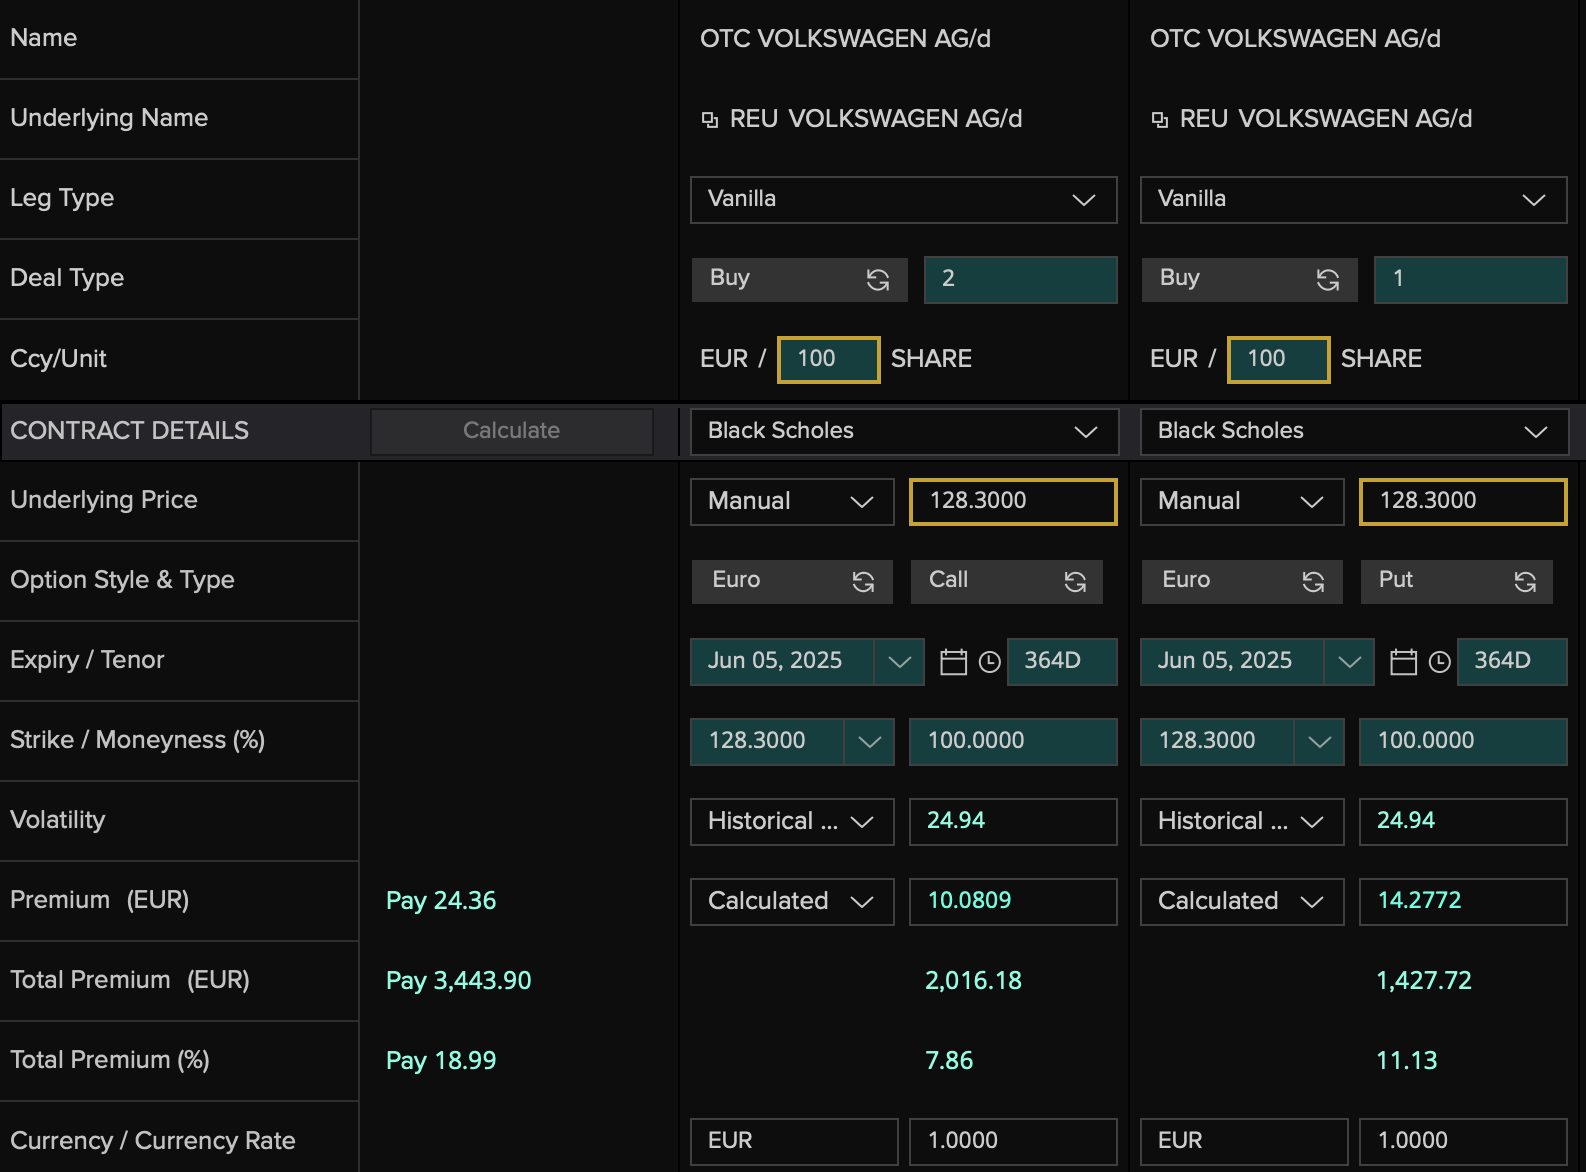

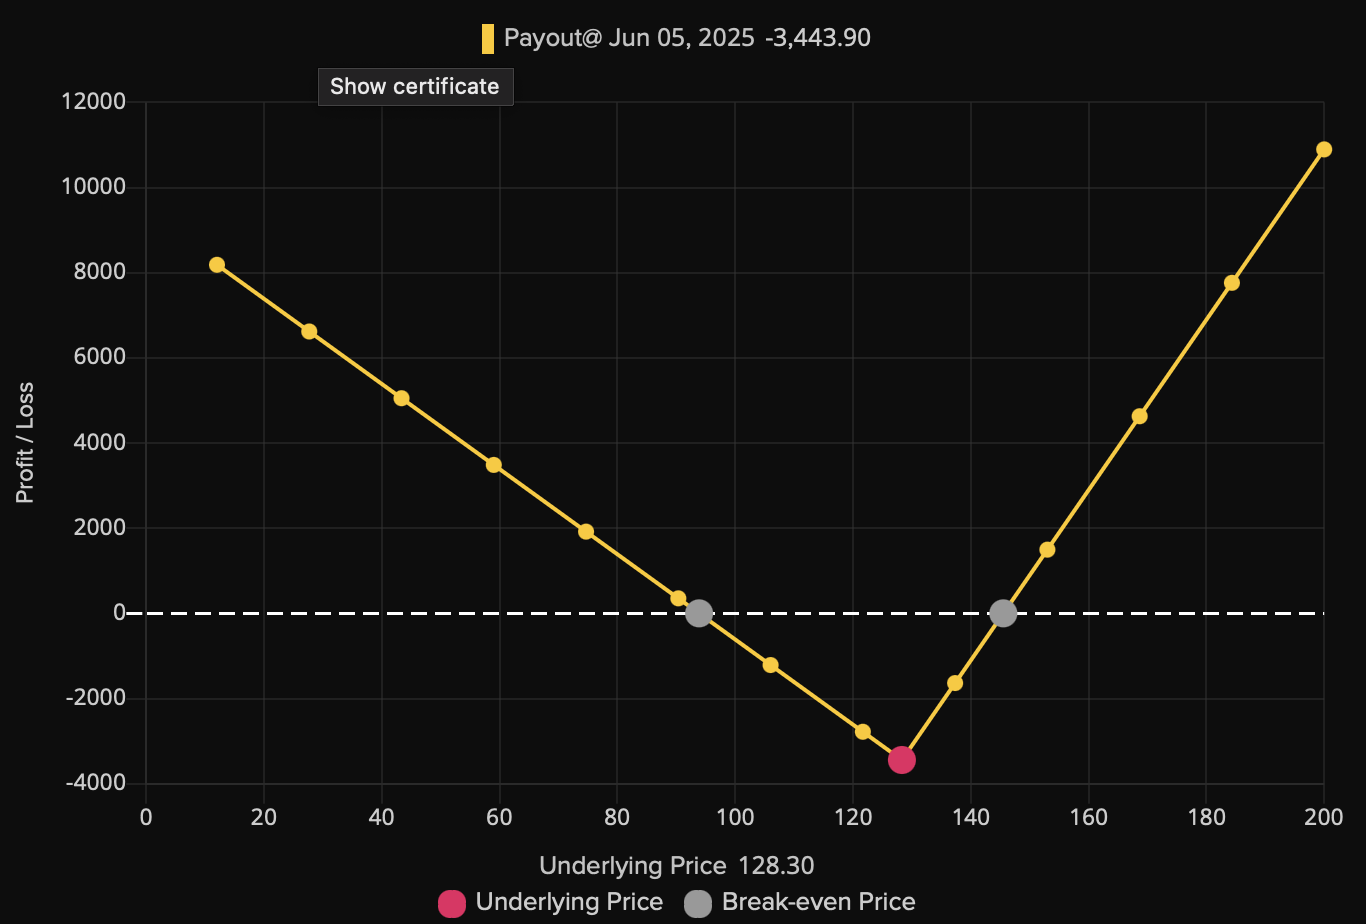

El strap que se propone permite llegar a puntos de equilibrio si el precio llega a 145 euros y a 93 euros. Pero dada la gran volatilidad que se espera para el siguiente año se puede esperar que cualquiera de las dos direcciones que llegue a tomar el precio será de manera fuerte, se podría llegar a esperar una volatilidad de igual tamaño que en el 2015 ya que es un acontecimiento de alto impacto los vehículos eléctricos. Con esta estrategia lo máximo que se podría llegar a perder son 3443 euros, con potenciales ganancias de 3500 euros en caso de que el precio de las acciones caiga hasta 60 euros y en el caso de que el precio suba hasta 180 euros se puede tener una ganancia de 7760 euros.

Tomando en cuenta que ya en una ocasión los precios de VOW llegaron a bajar por dañar la reputación de la empresa, en caso de que los nuevos modelos no tengan una buena aceptación por parte del público se podría generar una rentabilidad. Como se dijo anteriormente los precios en 2015 lograron bajar fuertemente por dañar la reputación. Haciendo que los precios bajen tan solo un año después bajo en 100 euros. Esto se puede ver en el siguiente gráfico.

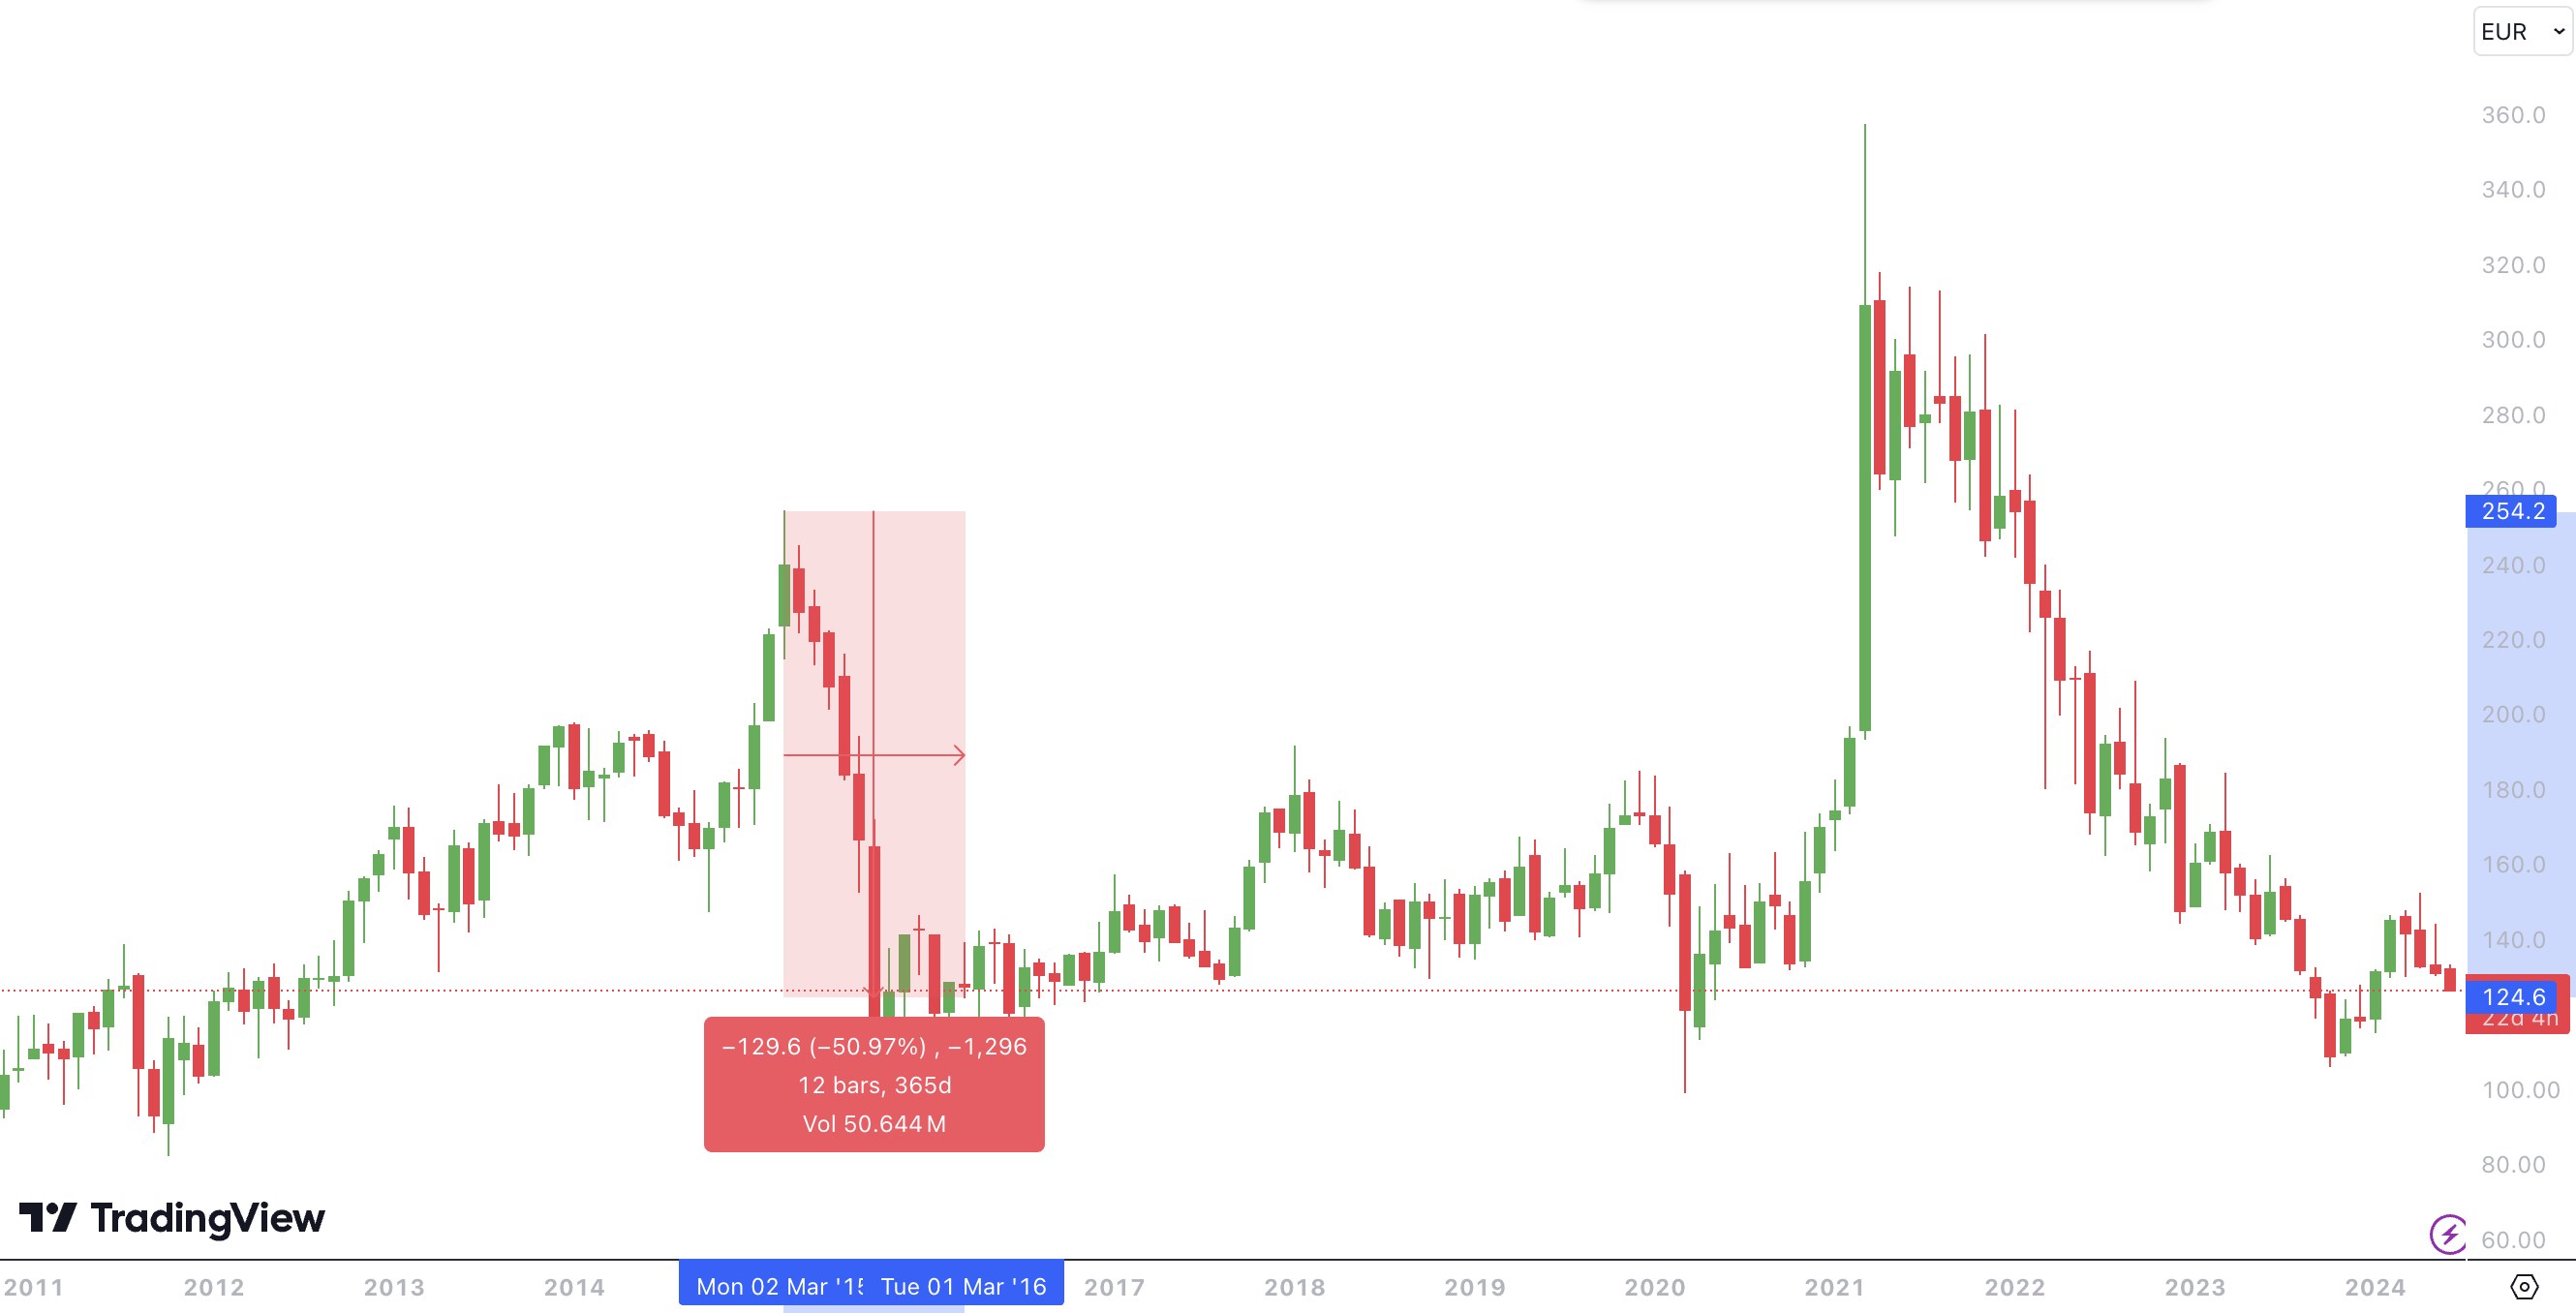

#6. Presentación de Gráficas e Indicadores

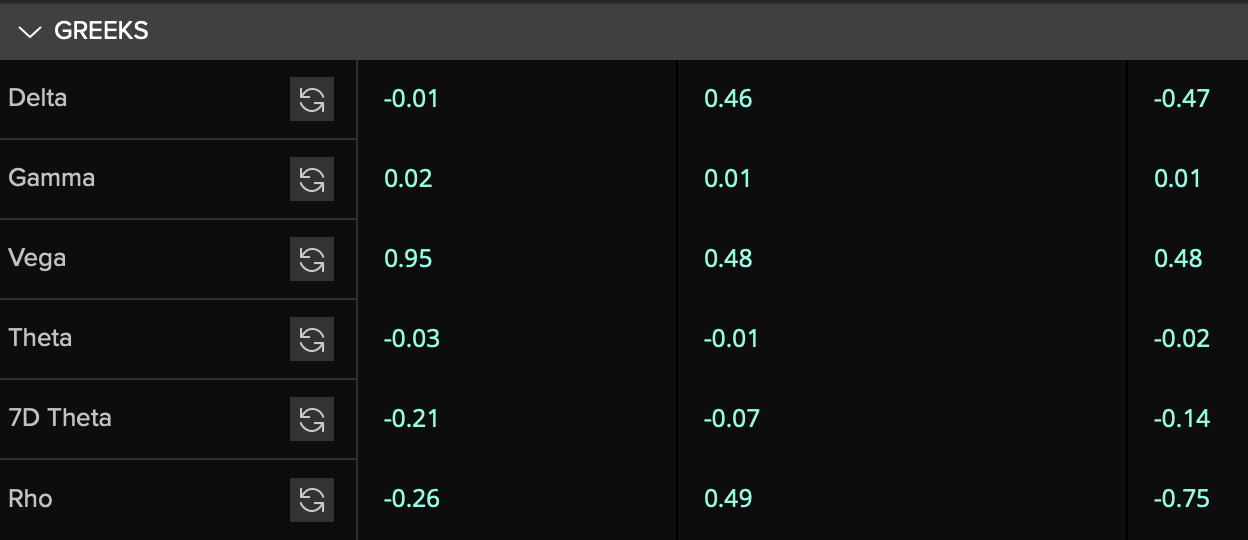

Portafolio:

Delta (Δ): -0.01

El valor del portafolio es poco sensible a cambios en el precio del activo subyacente. Un cambio de €1 en el precio del activo subyacente podría generar un cambio de aproximadamente €0.01 en el valor del portafolio.

Gamma (Γ): 0.02

La sensibilidad del Delta a cambios en el precio del activo subyacente es baja. Un cambio de €1 en el precio del activo subyacente podría generar un cambio pequeño en la sensibilidad del Delta.

Vega (V): 0.95

Indica que el valor del portafolio es bastante sensible a cambios en la volatilidad del activo subyacente. Un aumento de 1 punto en la volatilidad implícita podría generar un aumento de aproximadamente €0.95 en el valor del portafolio.

Theta (Θ): -0.03

El valor del portafolio disminuye a medida que se acerca la fecha de vencimiento de las opciones. La tasa de descomposición del valor del portafolio es de aproximadamente €0.03 por día.

Rho (Ρ): -0.26

Muestra que el valor del portafolio disminuye si la tasa libre de riesgo aumenta. Un aumento de 1% en la tasa libre de riesgo podría generar una disminución de aproximadamente €0.26 en el valor del portafolio.

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

# Función para calcular el precio de una opción y las letras griegas
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
        delta = norm.cdf(d1)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        delta = -norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")

    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    vega = S * norm.pdf(d1) * np.sqrt(T)
    theta = - (S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * norm.cdf(d2 if option_type == 'call' else -d2)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2 if option_type == 'call' else -d2)

    return {
        'price': price * 100,  # Precio total de 1 contrato (100 acciones)
        'delta': delta * 100,  # Delta total de 1 contrato (100 acciones)
        'gamma': gamma * 100,  # Gamma total de 1 contrato (100 acciones)
        'vega': vega * 100,    # Vega total de 1 contrato (100 acciones)
        'theta': theta * 100,  # Theta total de 1 contrato (100 acciones)
        'rho': rho * 100       # Rho total de 1 contrato (100 acciones)
    }

# Obtener el precio de cierre más reciente de VOW.DE hasta 2024-06-01
ticker = 'VOW.DE'
data = yf.download(ticker, start='2023-06-01', end='2024-06-01')
S0 = data['Close'][-1]

# Parámetros
K = 128.3  # Precio de ejercicio
T = 1    # Tiempo hasta la expiración en años
r = 0.025 # Tasa libre de riesgo
sigma = 0.1944 # Volatilidad

# Cálculo para dos opciones Call
call_option = black_scholes(S0, K, T, r, sigma, option_type='call')
call_option['price'] *= 2
call_option['delta'] *= 2
call_option['gamma'] *= 2
call_option['vega'] *= 2
call_option['theta'] *= 2
call_option['rho'] *= 2

# Cálculo para una opción Put
put_option = black_scholes(S0, K, T, r, sigma, option_type='put')

# Crear DataFrame para presentar los resultados
results = pd.DataFrame({
    'Metric': ['Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho'],
    'Call Option': [call_option['price'], call_option['delta'], call_option['gamma'], call_option['vega'], call_option['theta'], call_option['rho']],
    'Put Option': [put_option['price'], put_option['delta'], put_option['gamma'], put_option['vega'], put_option['theta'], put_option['rho']]
})

# Calcular las letras griegas del portafolio
portfolio_greeks = {
    'price': call_option['price'] + put_option['price'],
    'delta': call_option['delta'] + put_option['delta'],
    'gamma': call_option['gamma'] + put_option['gamma'],
    'vega': call_option['vega'] + put_option['vega'],
    'theta': call_option['theta'] + put_option['theta'],
    'rho': call_option['rho'] + put_option['rho']
}

portfolio_results = pd.DataFrame({
    'Metric': ['Price', 'Delta', 'Gamma', 'Vega', 'Theta', 'Rho'],
    'Portfolio': [portfolio_greeks['price'], portfolio_greeks['delta'], portfolio_greeks['gamma'], portfolio_greeks['vega'], portfolio_greeks['theta'], portfolio_greeks['rho']]
})

# Mostrar la tabla de resultados
print(results)
print(portfolio_results)


[*********************100%%**********************]  1 of 1 completed

  Metric   Call Option   Put Option
0  Price   2637.358511   721.904816
1  Delta    126.377470   -36.811265
2  Gamma      2.958019     1.479009
3   Vega   9883.314599  4941.657299
4  Theta  -1308.926392  -619.025637
5    Rho  13930.728535  5547.861904
  Metric     Portfolio
0  Price   3359.263327
1  Delta     89.566205
2  Gamma      4.437028
3   Vega  14824.971898
4  Theta  -1927.952029
5    Rho  19478.590439


#7. Estrategias de Cobertura Neutrales

Mediante un código Python se logró determina las posiciones que se tienen que tomar para poder cobertura los riesgos en cada uno de los casos. Dado que los cálculos de los valores por lo tanto también letras griegas también salen distinta a refinitv, se toma en cuenta solo los cálculos realizados con python. Dado que al poder ver los procedimiento son de mayor fiabilidad y además por tomar una tasa de interés conocida y justificada para los cálculos siendo la tasa de 2.5%.

##7.1. Delta Neutral

In [7]:
# Estrategia para Cobertura Delta Neutral
shares_needed = -portfolio_greeks['delta'] / 100  # Cada acción afecta Delta en 100 unidades
cost_delta_neutral = abs(shares_needed) * S0

print(f"Para una cobertura Delta Neutral, se necesitan comprar/vender {shares_needed} acciones de VOW.DE.")
print(f"El costo de esta cobertura es: {cost_delta_neutral:.2f} EUR.")


Para una cobertura Delta Neutral, se necesitan comprar/vender -0.895662045202437 acciones de VOW.DE.
El costo de esta cobertura es: 117.42 EUR.


##7.2. Delta y Gamma Neutral

In [11]:
# Estrategia para Cobertura Delta y Gamma Neutral
gamma_target = portfolio_greeks['gamma']
delta_target = portfolio_greeks['delta']

gamma_call = black_scholes(S0, K, T, r, sigma, option_type='call')['gamma']
gamma_put = black_scholes(S0, K, T, r, sigma, option_type='put')['gamma']

N = -gamma_target / gamma_call
delta_adjustment = delta_target + N * black_scholes(S0, K, T, r, sigma, option_type='call')['delta']

shares_needed = -delta_adjustment / 100  # Cada acción afecta Delta en 100 unidades
cost_delta_gamma_neutral = abs(N) * black_scholes(S0, K, T, r, sigma, option_type='call')['price'] + abs(shares_needed) * S0

print(f"Para una cobertura Delta y Gamma Neutral, se necesitan comprar/vender {N} contratos de opciones call adicionales y {shares_needed} acciones de VOW.DE.")
print(f"El costo de esta cobertura es: {cost_delta_gamma_neutral:.2f} EUR.")


Para una cobertura Delta y Gamma Neutral, se necesitan comprar/vender -3.0 contratos de opciones call adicionales y 1.0 acciones de VOW.DE.
El costo de esta cobertura es: 4087.14 EUR.


##7.3. Delta, Gamma y Vega Neutral

In [10]:
# Estrategia para Cobertura Delta, Gamma y Vega Neutral
vega_target = portfolio_greeks['vega']
gamma_target = portfolio_greeks['gamma']
delta_target = portfolio_greeks['delta']

vega_call = black_scholes(S0, K, T, r, sigma, option_type='call')['vega']
gamma_call = black_scholes(S0, K, T, r, sigma, option_type='call')['gamma']
delta_call = black_scholes(S0, K, T, r, sigma, option_type='call')['delta']

N_call = -gamma_target / gamma_call
vega_adjustment = vega_target + N_call * vega_call
N_put = -vega_adjustment / black_scholes(S0, K, T, r, sigma, option_type='put')['vega']
delta_adjustment = delta_target + N_call * delta_call + N_put * black_scholes(S0, K, T, r, sigma, option_type='put')['delta']

shares_needed = -delta_adjustment / 100  # Cada acción afecta Delta en 100 unidades
cost_delta_gamma_vega_neutral = abs(N_call) * black_scholes(S0, K, T, r, sigma, option_type='call')['price'] + abs(N_put) * black_scholes(S0, K, T, r, sigma, option_type='put')['price'] + abs(shares_needed) * S0

print(f"Para una cobertura Delta, Gamma y Vega Neutral, se necesitan comprar/vender {N_call} contratos de opciones call, {N_put} contratos de opciones put adicionales y {shares_needed} acciones de VOW.DE.")
print(f"El costo de esta cobertura es: {cost_delta_gamma_vega_neutral:.2f} EUR.")


Para una cobertura Delta, Gamma y Vega Neutral, se necesitan comprar/vender -3.0 contratos de opciones call, -0.0 contratos de opciones put adicionales y 1.0 acciones de VOW.DE.
El costo de esta cobertura es: 4087.14 EUR.


#8. Conclusiones


1. **Análisis Descriptivo y Estadístico**:
   - Los datos de precios de cierre de las acciones de Volkswagen (VOW.DE) fueron analizados desde el 1 de junio de 2023 hasta el 1 de junio de 2024.
   - Se calcularon estadísticas clave como la media de precios, desviación estándar, valores máximos y mínimos.
   - Estas estadísticas proporcionan una visión general del comportamiento del precio de las acciones en el último año, destacando su volatilidad y tendencias generales.

2. **Simulaciones de Monte Carlo**:
   - Se realizaron 1000 simulaciones de Monte Carlo para modelar el comportamiento futuro de los precios de las acciones de Volkswagen utilizando un movimiento browniano geométrico.
   - Los gráficos de estas simulaciones mostraron una variedad de posibles trayectorias de precios, permitiendo visualizar la incertidumbre y la variabilidad en las posibles evoluciones de precios futuros.

3. **Cálculo del Valor y Griegas de Opciones**:
   - Se utilizó el modelo Black-Scholes para calcular el precio y las letras griegas (Delta, Gamma, Vega, Theta, Rho) para opciones call y put europeas sobre las acciones de Volkswagen.
   - Los cálculos mostraron cómo las opciones responden a cambios en diferentes parámetros del mercado, proporcionando una base para estrategias de gestión de riesgos.

4. **Cobertura de Griegas**:
   - Se desarrollaron estrategias para neutralizar Delta, Delta y Gamma, y Delta, Gamma y Vega.
   - Para lograr una cobertura Delta neutral, se compraron acciones en proporción a la Delta negativa del portafolio.
   - Para una cobertura Delta y Gamma neutral, se compraron contratos de una tercera opción call.
   - Finalmente, para una cobertura Delta, Gamma y Vega neutral, se compraron contratos adicionales de una cuarta opción put.

5. **Costos de Cobertura**:
   - Se calcularon los costos asociados con la implementación de cada estrategia de cobertura.
   - La cobertura Delta neutral resultó ser la más económica, seguida por la cobertura Delta y Gamma, y finalmente la cobertura más completa de Delta, Gamma y Vega, que fue la más costosa debido a la necesidad de comprar múltiples opciones.

### Consideraciones Finales:
- **Rentabilidad y Riesgo**: La elección de una estrategia de cobertura depende del nivel de riesgo que se esté dispuesto a asumir y de los costos. En este caso se ve el comportamiento de VOW, A pesar de ser una acción que se espera se vuelva muy volátil, se puede aprovechar la volatilidad para tomar una opción más seguras con una estrategia strap. Las estrategias más complejas (neutralización de Delta, Gamma y Vega) proporcionan una cobertura más completa, pero a un costo más alto.
- **Impacto de la Volatilidad**: Las letras griegas, en particular Vega, resaltan la sensibilidad de las opciones a cambios en la volatilidad del mercado. Estrategias que incluyen neutralización de Vega pueden ser esenciales en mercados volátiles.
- **Aplicación Práctica**: Este análisis proporciona una base sólida para tomar decisiones informadas sobre la gestión de un portafolio de opciones, considerando tanto la protección contra movimientos adversos en el mercado como la optimización de costos de cobertura. Se tiene que destacar que a pesar de aprovechar mucho la volatilidad del mercado, no depende solo de la volatilidad. Puesto que se mostró y se hizo un análisis de expectativa de alza en los precios de Volkswagen.